In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
import numpy as np

In [8]:
path="/content/data"
folder_name=os.listdir(path)
folder_name=folder_name[1:]

In [9]:
images=[]
labels=[]
for j in folder_name:
  image_path=os.path.join(path,j)
  for i in os.listdir(image_path):
    if ".ipynb_checkpoints"!=i:
      images.append(preprocess_input(img_to_array(load_img(os.path.join(image_path,i),target_size=(224,224)))))
      labels.append(j)

In [10]:
images=np.array(images,dtype="float32")
labels=np.array(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


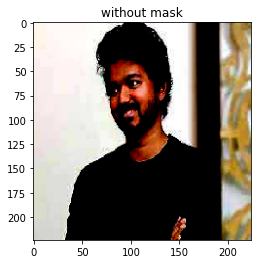

In [14]:
import matplotlib.pyplot as plt
plt.title(labels[0])
plt.imshow(images[0])
plt.show()

In [5]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
labels=to_categorical(LabelBinarizer().fit_transform(labels))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.20)

In [7]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                       horizontal_flip=True,fill_mode="nearest")

In [8]:
from tensorflow.keras.layers import Input
basemodel=MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [9]:
headmodel=basemodel.output
headmodel=tf.keras.layers.AveragePooling2D(pool_size=(7,7))(headmodel)
headmodel=tf.keras.layers.Flatten()(headmodel)
headmodel=tf.keras.layers.Dense(128)(headmodel)
headmodel=tf.keras.layers.Dropout(0.5)(headmodel)
headmodel=tf.keras.layers.Dense(2,activation="softmax")(headmodel)

In [10]:
model=tf.keras.Model(inputs=basemodel.input,outputs=headmodel)

In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
n=30
h=model.fit(aug.flow(X_train,Y_train,batch_size=2),validation_data=(X_test,Y_test),epochs=n)

Epoch 1/2
2/2 [==============================] - 7s 1s/step - loss: 0.9561 - accuracy: 0.3333 - val_loss: 1.5017 - val_accuracy: 0.0000e+00
Epoch 2/2
2/2 [==============================] - 1s 271ms/step - loss: 0.3335 - accuracy: 1.0000 - val_loss: 4.4873 - val_accuracy: 0.0000e+00


In [13]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 57ms/step - loss: 4.4873 - accuracy: 0.0000e+00


[4.487349987030029, 0.0]

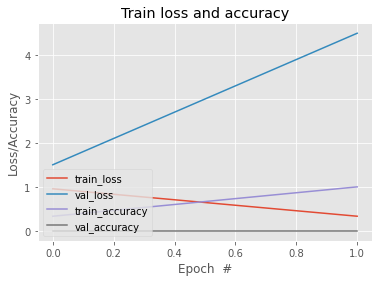

In [14]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n),h.history["loss"],label="train_loss")
plt.plot(np.arange(0,n),h.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,n),h.history["accuracy"],label="train_accuracy")
plt.plot(np.arange(0,n),h.history["val_accuracy"],label="val_accuracy")
plt.title("Train loss and accuracy")
plt.xlabel("Epoch  #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [46]:
model.save("/content/data/mask_detector1.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
